In [1]:
import pickle

#unpacking the file
with open(r"C:\Users\ravir\OneDrive\Desktop\state-farm-distracted-driver-detection\images.p", 'rb') as f:
    images = pickle.load(f)
    
with open(r"C:\Users\ravir\OneDrive\Desktop\state-farm-distracted-driver-detection\labels.p", 'rb') as f:
    labels = pickle.load(f)   

In [2]:
print(images.shape)
print(labels.shape)

(22424, 100, 100)
(22424,)


In [3]:
set(labels)

{'c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9'}

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(labels)

In [5]:
set(labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [6]:
import numpy as np

In [8]:
n_persons = len(set(labels))
print("Number of distracted_detection: ", n_persons)
label_mapping = le.inverse_transform(np.arange(n_persons))
for i in range(len(label_mapping)):
  print(i, "-->", label_mapping[i])

Number of distracted_detection:  10
0 --> c0
1 --> c1
2 --> c2
3 --> c3
4 --> c4
5 --> c5
6 --> c6
7 --> c7
8 --> c8
9 --> c9


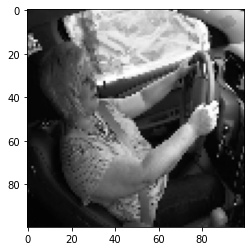

In [9]:
import matplotlib.pyplot as plt

plt.imshow(images[69], cmap=plt.get_cmap("gray"))
plt.show()

In [10]:
import cv2

In [11]:
def preprocessing(img):
  img = cv2.equalizeHist(img)
  img = img.reshape(100, 100, 1)
  img = img/255
  return img

In [12]:
images = np.array(list(map(preprocessing, images)))
print("Shape of Input: ", images.shape)

Shape of Input:  (22424, 100, 100, 1)


In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
labels = to_categorical(labels)

In [15]:
categories = labels.shape[1]
print(categories)

10


In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
# import convolution layer
from tensorflow.keras.layers import Conv2D
# import pooling layer
from tensorflow.keras.layers import MaxPooling2D
# import faltten layer
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop

from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D,GlobalAveragePooling2D

from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

from keras.callbacks import ReduceLROnPlateau

In [17]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding="same",input_shape = (100,100,1)))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=1))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=1))

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dense(10))
model.add(Activation("softmax"))
model.build((0,100,100,1))

In [18]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      320       
                                                                 
 activation (Activation)     (None, 100, 100, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 100, 100, 32)     400       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 33, 33, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 33, 33, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 33, 33, 64)        0

In [19]:
learning_rate_reduction = ReduceLROnPlateau(monitor='accuracy',
                                            patience = 2,
                                            verbose=1,
                                            factor=0.1,
                                            min_lr=0.000001)

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [20]:
#compiling the model
model.compile(RMSprop(learning_rate=0.0001), loss="categorical_crossentropy", metrics=['accuracy'])

In [ ]:
h = model.fit(images,labels,validation_split=0.01,batch_size=250,epochs=10,verbose=1)

Epoch 1/10
89/89 [==============================] - 720s 8s/step - loss: 0.4434 - accuracy: 0.8778 - val_loss: 3.0080 - val_accuracy: 0.0000e+00
Epoch 2/10
89/89 [==============================] - 892s 10s/step - loss: 0.0367 - accuracy: 0.9930 - val_loss: 5.0438 - val_accuracy: 0.0000e+00
Epoch 3/10
89/89 [==============================] - 824s 9s/step - loss: 0.0111 - accuracy: 0.9985 - val_loss: 6.3461 - val_accuracy: 0.0000e+00
Epoch 4/10
24/89 [=======>......................] - ETA: 75:36:10 - loss: 0.0057 - accuracy: 0.9990

In [ ]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.show()

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
layer0 = Model(model.layers[0].input, model.layers[0].output)
features = layer0.predict(images[69].reshape(1,100,100,1))

In [ ]:
features.shape

In [ ]:
plt.figure(figsize=(10,15))
for i in range(32):
  axes = plt.subplot(8, 4, i+1)
  plt.imshow(features[0,:,:,i])

In [ ]:
from google.colab import files
upload=files.upload()

In [ ]:
d=list(upload.keys())[0]

In [ ]:
import cv2
a=np.fromstring(upload[d],np.uint8)
img=cv2.imdecode(a,cv2.IMREAD_COLOR)
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(a)
plt.imshow(img,cmap=plt.get_cmap("gray"))

In [ ]:
img=np.asarray(img)
img=cv2.resize(img,(100,100))
img=preprocessing(img)

In [ ]:
img=img.reshape(1,100,100,1)
print(model.predict(img))

In [ ]:
prediction=model.predict(img)

In [ ]:
p=np.argmax(prediction,axis=1)
l = p.tolist()
l

In [ ]:
for i in l:
  if i == 0:
    print('Safe driving')
  elif i == 1:
    print('Texting - right')
  elif i == 2:
    print('Talking on the phone - right')
  elif i == 3:
    print('Texting - left')
  elif i == 4:
    print('Talking on the phone - left')
  elif i == 5:
    print('Operating the radio')
  elif i == 6:
    print('Drinking')
  elif i == 7:
    print('Reaching behind')
  elif i == 8:
    print('Hair and makeup')
  elif i == 9:
    print('Talking to passenger')